In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.chdir('C:/Users/malay/Desktop/Dataset')


In [56]:
df=pd.read_csv('survey_results_public.csv')
df.shape

(73268, 79)

In [5]:
df_schema=pd.read_csv('survey_results_schema.csv')
df_schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df1=df[df['DevType']=='Data scientist or machine learning specialist']
df2=df[df['DevType']=='Data or business analyst']
frames=[df1,df2]
df_ds=pd.concat(frames)


In [8]:
df_ds.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
463,464,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow,NaN,13,9,Data scientist or machine learning specialist,20 to 99 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Israel,ILS\tIsraeli new shekel,42000.0,Monthly,Bash/Shell;Python;SQL,NaN,DynamoDB;Elasticsearch;PostgreSQL,NaN,AWS;Google Cloud,NaN,FastAPI,NaN,Keras;NumPy;Pandas;Scikit-learn;TensorFlow;Tor...,NaN,Docker;Homebrew,NaN,PyCharm,NaN,NaN,macOS,Git,Code editor,NaN,NaN,monday.com;Notion,NaN,Google Chat;Slack;Zoom,NaN,Indifferent,Stack Overflow;Stack Exchange,Multiple times per day,No,NaN,Not sure,25-34 years old,Man,No,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,150660.0
1089,1090,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Online books;Video-bas...,NaN,6,4,Data scientist or machine learning specialist,"10,000 or more employees",I have little or no influence,Start a free trial;Visit developer communities...,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,NaN,NaN,Python,Go;Rust,NaN,NaN,NaN,NaN,NaN,NaN,Keras;NumPy;Pandas;TensorFlow,NaN,Docker;Kubernetes,Docker;Kubernetes,IPython/Jupyter;Visual Studio Code,Visual Studio Code,macOS,macOS,Git,Command-line,NaN,NaN,Confluence;Jira Work Management,Confluence;Jira Work Management,Cisco Webex Teams;Microsoft Teams;Slack,Slack,Unfavorable,Stack Overflow;Stack Exchange,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, not really",25-34 years old,Man,No,Straight / Heterosexual,White;European,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
1704,1705,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,24,11,Data scientist or machine learning specialist,20 to 99 employees,I have some influence,Visit developer communities like Stack Overflo...,United States of America,USD\tUnited States dollar,151992.0,Yearly,Elixir;Python;Rust;SQL;TypeScript,Elixir;Julia;Python;Rust;SQL,Elasticsearch;MySQL;PostgreSQL;

# Popular Language among Data Specialists

In [9]:
df_python=df_ds[df_ds['LanguageHaveWorkedWith'].str.contains("Python", case=False, na=False)]
df_python
len(df_python)
print("Hence {} % of the total data specialists in the survey have used Python(among other languages as well) on their Job".format(len(df_python)*100/(df_ds.shape[0]-sum(df_ds['LanguageHaveWorkedWith'].isnull()))))

Hence 85.59670781893004 % of the total data specialists in the survey have used Python(among other languages as well) on their Job


In [10]:
sum(df_ds['LanguageHaveWorkedWith'].isnull())

13

In [11]:
df_R=df_ds[df_ds['LanguageHaveWorkedWith'].str.contains("R;", case=True, na=False)]
df_R_only= df_ds[df_ds['LanguageHaveWorkedWith']=='R']
frames_2=[df_R, df_R_only]
df_R_concat= pd.concat(frames_2)
print("Hence {} % of the total data specialists in the survey have used R(among other languages as well) on their Job".format(len(df_R_concat)*100/(len(df_ds)-sum(df_ds['LanguageHaveWorkedWith'].isnull()))))

Hence 24.96570644718793 % of the total data specialists in the survey have used R(among other languages as well) on their Job


Percentage of people who have used both Python and R as part of their work

In [12]:
df_python_R=df_ds[df_ds['LanguageHaveWorkedWith'].str.contains("Python", case=False, na=False) & df_ds['LanguageHaveWorkedWith'].str.contains(";R;", case=False, na=False)]
df_python_R
print("Hence {} % of the total data specialists in the survey who have used both Python and R on their Job".format(len(df_python_R)*100/len(df_ds)))

Hence 19.54177897574124 % of the total data specialists in the survey who have used both Python and R on their Job


Calculating the percentage of people who have worked on Python( among other languages as well) but have not worked on R

In [13]:
(len(df_python)-(len(df_python_R)))*100/len(df_ds)

64.55525606469003

Calculating the percentage of people who have worked on R( among other languages as well) but have not worked on Python

In [14]:
(len(df_R)-(len(df_python_R)))*100/len(df_ds)

3.504043126684636

In [15]:
df_Julia=df_ds[df_ds['LanguageHaveWorkedWith'].str.contains("Julia", case=False, na=False)]
len(df_Julia)
print("Hence {} % of the total data specialists in the survey have used Julia(among other languages as well) on their Job".format(len(df_Julia)*100/(df_ds.shape[0]-sum(df_ds['LanguageHaveWorkedWith'].isnull()))))

Hence 5.349794238683128 % of the total data specialists in the survey have used Julia(among other languages as well) on their Job


In [16]:
df_Rust=df_ds[df_ds['LanguageHaveWorkedWith'].str.contains("Rust", case=False, na=False)]
len(df_Rust)
print("Hence {} % of the total data specialists in the survey have used Rust(among other languages as well) on their Job".format(len(df_Rust)*100/(df_ds.shape[0]-sum(df_ds['LanguageHaveWorkedWith'].isnull()))))

Hence 3.017832647462277 % of the total data specialists in the survey have used Rust(among other languages as well) on their Job


In [17]:
df_Elixir=df_ds[df_ds['LanguageHaveWorkedWith'].str.contains("Elixir", case=False, na=False)]
len(df_Julia)
print("Hence {} % of the total data specialists in the survey have used Elixir(among other languages as well) on their Job".format(len(df_Elixir)*100/(df_ds.shape[0]-sum(df_ds['LanguageHaveWorkedWith'].isnull()))))

Hence 0.27434842249657065 % of the total data specialists in the survey have used Elixir(among other languages as well) on their Job


In [18]:
df_Go=df_ds[df_ds['LanguageHaveWorkedWith'].str.contains("Go", case=False, na=False)]
len(df_Go)
print("Hence {} % of the total data specialists in the survey have used Go(among other languages as well) on their Job".format(len(df_Go)*100/(df_ds.shape[0]-sum(df_ds['LanguageHaveWorkedWith'].isnull()))))

Hence 3.017832647462277 % of the total data specialists in the survey have used Go(among other languages as well) on their Job


In [66]:
df_SQL=df_ds[df_ds['LanguageHaveWorkedWith'].str.contains("SQL", case=True, na=False)]
print("Hence {} % of the total data specialists in the survey have used SQL(among other languages as well) on their Job".format(len(df_SQL)*100/(len(df_ds)-sum(df_ds['LanguageHaveWorkedWith'].isnull()))))

Hence 60.35665294924554 % of the total data specialists in the survey have used SQL(among other languages as well) on their Job


In [67]:
df_prog= pd.DataFrame({'Programming Language' : ['Python', 'R', 'Julia', 'Rust', 'Julia', 'Go', 'SQL'], 'Proportion of People using': [0.85,0.24,0.05,0.03,0.0027,0.03, 0.603]})
df_prog_sort=df_prog.sort_values('Proportion of People using')

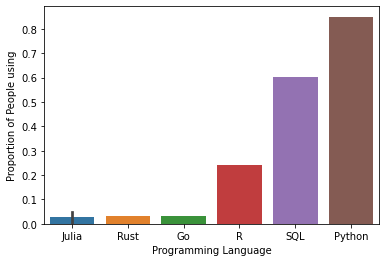

In [68]:
import seaborn as sns
sns.barplot(x='Programming Language', y='Proportion of People using', data= df_prog_sort)
plt.show()

Hence, Python is predominantly used among Data specialists as per the data. Whereas, there is a very low percentage of data specialists who have used R on their Job but have not worked on Python yet.

# Popular Database to work with for Data Specialists

In [30]:
df_mysql=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("MySql", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using MySql(among other databases as well) on their Job".format(len(df_mysql)*100/len(df_ds)))

Hence 29.919137466307276 % of the total data specialists in the survey using MySql(among other databases as well) on their Job


In [31]:
df_PostgreSQL=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("PostgreSQL", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using PostgreSQL(among other databases as well) on their Job".format(len(df_PostgreSQL)*100/len(df_ds)))

Hence 36.79245283018868 % of the total data specialists in the survey using PostgreSQL(among other databases as well) on their Job


In [32]:
df_DynamoDB=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("DynamoDB", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using DynamoDB(among other databases as well) on their Job".format(len(df_DynamoDB)*100/len(df_ds)))

Hence 3.234501347708895 % of the total data specialists in the survey using DynamoDB(among other databases as well) on their Job


In [33]:
df_Elasticsearch=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("Elasticsearch", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using Elasticsearch(among other databases as well) on their Job".format(len(df_Elasticsearch)*100/len(df_ds)))

Hence 7.681940700808625 % of the total data specialists in the survey using Elasticsearch(among other databases as well) on their Job


In [34]:
df_SQLite=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("SQLite", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using SQLite(among other databases as well) on their Job".format(len(df_SQLite)*100/len(df_ds)))

Hence 22.641509433962263 % of the total data specialists in the survey using SQLite(among other databases as well) on their Job


In [35]:
df_Redis=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("Redis", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using Redis(among other databases as well) on their Job".format(len(df_Redis)*100/len(df_ds)))

Hence 8.221024258760108 % of the total data specialists in the survey using Redis(among other databases as well) on their Job


In [36]:
df_Microsoft_SQL=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("Microsoft SQL Server", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using Microsoft SQL Server(among other databases as well) on their Job".format(len(df_Microsoft_SQL)*100/len(df_ds)))

Hence 25.202156334231805 % of the total data specialists in the survey using Microsoft SQL Server(among other databases as well) on their Job


In [37]:
df_Oracle=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("Oracle", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using Oracle(among other databases as well) on their Job".format(len(df_Oracle)*100/len(df_ds)))

Hence 9.838274932614555 % of the total data specialists in the survey using Oracle(among other databases as well) on their Job


In [38]:
df_MongoDB=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("MongoDB", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using MongoDB(among other databases as well) on their Job".format(len(df_MongoDB)*100/len(df_ds)))

Hence 13.611859838274933 % of the total data specialists in the survey using MongoDB(among other databases as well) on their Job


In [39]:
df_Cassandra=df_ds[df_ds['DatabaseHaveWorkedWith'].str.contains("Cassandra", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey using Cassandra(among other databases as well) on their Job".format(len(df_Cassandra)*100/len(df_ds)))

Hence 1.482479784366577 % of the total data specialists in the survey using Cassandra(among other databases as well) on their Job


In [40]:
df_db= pd.DataFrame({'Database' : ['MySQL', 'PostgreSQL', 'DynamoDB', 'Elastic Search', 'SQLite', 'Redis', 'Microsoft Sql Server','Oracle', 'MongoDB', 'Cassandra'], 'Proportion of People using': [0.29,0.36,0.03,0.07,0.22,0.08,0.25,0.09,0.13,0.014]})
df_db_sort=df_db.sort_values('Proportion of People using')
df_db_sort

,Database,Proportion of People using
9,Cassandra,0.014
2,DynamoDB,0.030
3,Elastic Search,0.070
5,Redis,0.080
7,Oracle,0.090
8,MongoDB,0.130
4,SQLite,0.220
6,Microsoft Sql Server,0.250
0,MySQL,0.290
1,PostgreSQL,0.360


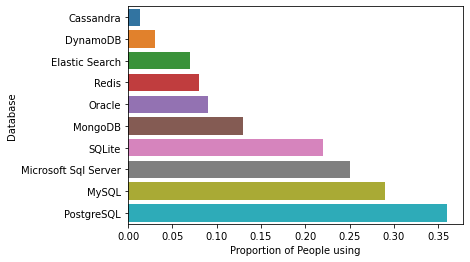

In [41]:
sns.barplot(x='Proportion of People using', y='Database', data= df_db_sort, orient='h')
plt.show()

# Which Operating System is popular among the data professionals?

In [61]:
df_macos=df_ds[df_ds['OpSysProfessional use'].str.contains("macOS", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey who have used macOS(among other OS as well) on their Job".format(len(df_macos)*100/(df_ds.shape[0]-sum(df_ds['OpSysProfessional use'].isnull()))))

Hence 28.694404591104735 % of the total data specialists in the survey who have used macOS(among other OS as well) on their Job


In [62]:
df_Windows=df_ds[df_ds['OpSysProfessional use'].str.contains("Windows", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey who have used Windows(among other OS as well) on their Job".format(len(df_Windows)*100/(df_ds.shape[0]-sum(df_ds['OpSysProfessional use'].isnull()))))

Hence 61.8364418938307 % of the total data specialists in the survey who have used Windows(among other OS as well) on their Job


In [63]:
df_linux=df_ds[df_ds['OpSysProfessional use'].str.contains("Linux-based", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey who have used Linux(among other OS as well) on their Job".format(len(df_linux)*100/(df_ds.shape[0]-sum(df_ds['OpSysProfessional use'].isnull()))))

Hence 38.020086083213776 % of the total data specialists in the survey who have used Linux(among other OS as well) on their Job


In [64]:
df_wsl=df_ds[df_ds['OpSysProfessional use'].str.contains("WSL", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey who have used WSL(among other OS as well) on their Job".format(len(df_wsl)*100/(df_ds.shape[0]-sum(df_ds['OpSysProfessional use'].isnull()))))

Hence 11.190817790530847 % of the total data specialists in the survey who have used WSL(among other OS as well) on their Job


In [65]:
df_bsd=df_ds[df_ds['OpSysProfessional use'].str.contains("BSD", case=False, na=False)]
print("Hence {} % of the total data specialists in the survey who have used BSD(among other OS as well) on their Job".format(len(df_bsd)*100/(df_ds.shape[0]-sum(df_ds['OpSysProfessional use'].isnull()))))

Hence 0.430416068866571 % of the total data specialists in the survey who have used BSD(among other OS as well) on their Job
